In [2]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=386eea3c6279afb9106b5256557457ded1705ef36aef4d1585a5295afa2195bb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from lime.lime_text import LimeTextExplainer


categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'soc.religion.christian'])
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
y_train = newsgroups_train.target

Document id: 0
Predicted class: soc.religion.christian
True class: soc.religion.christian

Explanation:
('Scrolls', 0.01583073771929704)
('Dead', 0.014227714816426021)
('Library', -0.01399516650642093)
('University', 0.0138506419843869)
('Authority', 0.010825110920050883)
('Michael', 0.009683572601557468)
('Qumran', 0.00840877954474931)
('22', 0.007904628733449109)
('Sea', -0.003150944700387793)
('Host', -0.0029867123381107103)


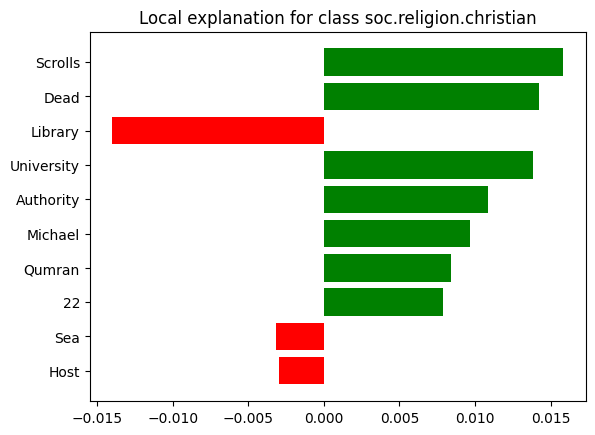

In [13]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

explainer = LimeTextExplainer(class_names=categories)


text_instance = newsgroups_train.data[0]


exp = explainer.explain_instance(
    text_instance,
    classifier_fn=lambda x: clf.predict_proba(vectorizer.transform(x))
)


print(f"Document id: {0}")
print(f"Predicted class: {categories[clf.predict(X_train[0])[0]]}")
print(f"True class: {categories[y_train[0]]}")
print("\nExplanation:")
print("\n".join(map(str, exp.as_list())))


exp.as_pyplot_figure()
plt.show()